# 📈 Modelo VARIMA (Vector Autoregressive Integrated Moving Average)

El modelo **VARIMA** es una generalización multivariada del modelo univariado ARIMA. Se utiliza para modelar y pronosticar **múltiples series de tiempo interdependientes** simultáneamente.

## 1. 📝 Fundamento Teórico

### A. La Necesidad del VARIMA

Cuando el Test de Causalidad de Granger indica que la variable $X$ ayuda a predecir $Y$ (y/o viceversa), se concluye que las series son **predictivamente interdependientes**.

* **Error de Modelado Univariado:** Usar un modelo ARIMA univariado (solo $Y_t$ depende de $Y_{t-i}$) ignora la información predictiva valiosa de $X$.
* **Solución VARIMA:** El VARIMA (o su versión más común, el VAR/VECM) modela cada variable como una función de sus propios rezagos **y** los rezagos de **todas las demás variables** del sistema.

### B. Estructura del Modelo

Un proceso VARIMA $(p, d, q)$ se descompone en tres partes vectoriales:

1.  **I (Integrado, $d$):** El orden de diferenciación necesario para hacer que las series sean estacionarias.
2.  **AR (Autorregresivo, $p$):** Dependencia de los rezagos de las variables en sí mismas.
3.  **MA (Medias Móviles, $q$):** Dependencia de los rezagos de los términos de error.

**Ecuación (Simplificada a VAR($p$)):**

Para un sistema con $k$ variables (e.g., $k=2$, $Y_t$ y $X_t$), el modelo de **Vector Autoregresivo (VAR)** de orden $p$ es la base del VARIMA (si $d=0$ y $q=0$).

$$
\begin{pmatrix} Y_t \\ X_t \end{pmatrix} = \mathbf{c} + \mathbf{\Phi}_1 \begin{pmatrix} Y_{t-1} \\ X_{t-1} \end{pmatrix} + \dots + \mathbf{\Phi}_p \begin{pmatrix} Y_{t-p} \\ X_{t-p} \end{pmatrix} + \begin{pmatrix} \epsilon_{Y,t} \\ \epsilon_{X,t} \end{pmatrix}
$$

Donde:
* $\mathbf{c}$ es un vector de constantes.
* $\mathbf{\Phi}_i$ son **matrices** de coeficientes de tamaño $k \times k$ (e.g., $2 \times 2$). Cada coeficiente $\phi_{ij}$ mide el impacto del rezago de la variable $j$ en la variable $i$.

### C. Importancia de la Estacionariedad y Cointegración

* **Si las series son Estacionarias (o se vuelven estacionarias por diferenciación $d$):** Se usa el modelo **VARIMA** o **VAR** (si $q=0$).
* **Si las series son No Estacionarias pero Cointegradas:** Las series tienen una relación de equilibrio a largo plazo. En este caso, se usa un **Vector Error Correction Model (VECM)**, que es una forma especial del VARIMA que incluye el "término de corrección de error" para modelar el retorno al equilibrio.

## 2. 🎯 ¿Por Qué Usarlo con Prioridad Después del Test de Granger?

El Test de Causalidad de Granger no solo justifica el uso del modelo, sino que **dicta** su superioridad predictiva:

1.  **Incorporación del Conocimiento Predictivo:** El Test de Granger confirmó que los coeficientes $\alpha_j$ (que relacionan $X_{t-j}$ con $Y_t$) son significativos. El VARIMA incorpora formalmente estos coeficientes en sus matrices $\mathbf{\Phi}$, asegurando que se utilice toda la información predictiva disponible en el sistema.

2.  **Pronósticos Consistentes:** El modelo produce pronósticos **conjuntos**. En el horizonte de pronóstico, el pronóstico de $X_{t+1}$ se usa para ayudar a pronosticar $Y_{t+2}$, y viceversa. Un ARIMA univariado ignoraría esta retroalimentación.

3.  **Análisis de Impacto (Función Impulso-Respuesta):** Los modelos VARIMA (y VAR) permiten el análisis de la **Función de Impulso-Respuesta (IRF)**. Esto permite preguntar: *¿Cómo afecta un choque (shock) de una desviación estándar en $X_t$ la trayectoria futura de $Y$ a lo largo del tiempo?* Esta es una herramienta clave en la economía y finanzas.

## 3. 🐍 Código Python (Jupyter Notebook)

Usaremos el modelo **VAR** (que es VARIMA $(p, 0, 0)$ ) ya que es el más común para series de tiempo económicas y financieras.

✅ Series sintéticas X y Y creadas (N=500).

⚠️ Las series originales no son estacionarias (ADF p-value >= 0.05). Usando primeras diferencias.
--------------------------------------------------
Seleccionando el orden óptimo (p) para el VAR...
Mejor orden (p) según AIC: p = 8
--------------------------------------------------
Estimando el Modelo VAR(8)...


--- Resumen del Modelo VAR Estimado (Muestra ambas ecuaciones Y y X) ---
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 15, Dec, 2025
Time:                     14:46:27
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    647.303
Nobs:                     491.000    HQIC:                   647.126
Log likelihood:          -160201.    FPE:               9.86040e+280
AIC:                      647.012    Det(Omega_mle):    9.21149e+280
-------------------------------------------------

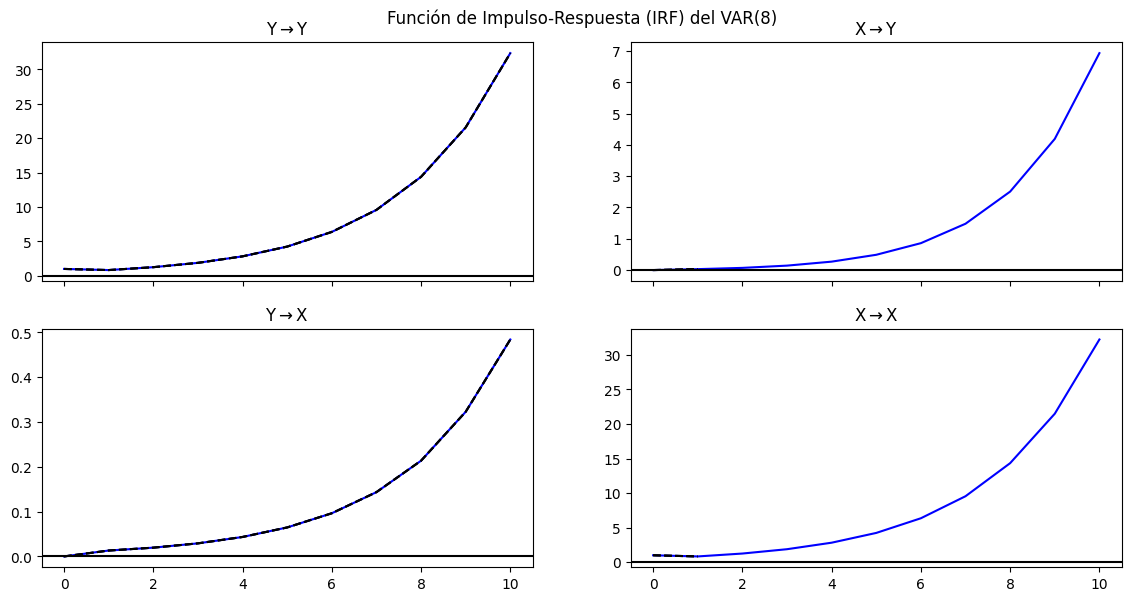

In [4]:
# %%
from statsmodels.tsa.api import VAR, adfuller
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# --- 1. Generación de Series de Tiempo (Reutilizando el ejemplo anterior) ---
np.random.seed(42)
N = 500  # Número de observaciones

# Series X y Y donde X causa Granger a Y
X = np.zeros(N)
Y = np.zeros(N)
ruido_x = np.random.normal(0, 1, N)
ruido_y = np.random.normal(0, 1, N)

# Creamos series NO estacionarias intencionalmente
for t in range(1, N):
    # Tendencia o fuerte persistencia para asegurar No Estacionariedad
    X[t] = X[t-1] + 0.5 * X[t-1] + ruido_x[t] * 0.1 # Muy persistente
    Y[t] = Y[t-1] + 0.5 * Y[t-1] + 0.3 * X[t-1] * 0.1 + ruido_y[t] * 0.1

df_var = pd.DataFrame({'Y': Y, 'X': X})
print(f"✅ Series sintéticas X y Y creadas (N={N}).")

# --- 2. Asegurar Estacionariedad (VARIMA/VAR REQUIERE series estacionarias) ---

def make_stationary(df):
    """Aplica diferenciación si las series no pasan el test ADF."""
    is_non_stationary = False
    for col in df.columns:
        if adfuller(df[col])[1] >= 0.05: # Si p-value >= 0.05, no es estacionaria
            is_non_stationary = True
            break
            
    if is_non_stationary:
        print("\n⚠️ Las series originales no son estacionarias (ADF p-value >= 0.05). Usando primeras diferencias.")
        return df.diff().dropna()
    else:
        print("\n✅ Las series se consideran estacionarias (o muy cercanas) y se usan directamente.")
        return df

data_stationary = make_stationary(df_var)

# --- 3. Selección del Orden Óptimo (Lag Order Selection) ---
print("-" * 50)
print("Seleccionando el orden óptimo (p) para el VAR...")

# La selección de orden solo se puede hacer si hay suficientes datos después de la diferenciación
if len(data_stationary) < 10:
    print("❌ No hay suficientes datos después de la diferenciación. Usando p=1 por defecto.")
    optimal_lag = 1
else:
    model_var_select = VAR(data_stationary)
    # Usamos try-except por si la matriz de covarianza es singular con un maxlags muy alto
    try:
        results_select = model_var_select.select_order(maxlags=10)
        # Usamos el lag sugerido por AIC, que equilibra bondad de ajuste y complejidad
        optimal_lag = results_select.aic 
        print(f"Mejor orden (p) según AIC: p = {optimal_lag}")
    except ValueError:
        print("❌ Error al seleccionar el orden (puede ser por datos). Usando p=1 por defecto.")
        optimal_lag = 1


# --- 4. Estimación del Modelo VAR(p) ---
print("-" * 50)
print(f"Estimando el Modelo VAR({optimal_lag})...\n")

model_var = VAR(data_stationary)
results_var = model_var.fit(optimal_lag)

print("\n--- Resumen del Modelo VAR Estimado (Muestra ambas ecuaciones Y y X) ---")
# CORRECCIÓN: Imprimimos el resumen directamente, que resuelve el AttributeError
print(results_var.summary()) 


# --- 5. Pronóstico y Análisis de Impulso-Respuesta (IRF) ---

# a) Pronóstico (Forecast)
lag_order = results_var.k_ar # Número de rezagos usados en el modelo ajustado
forecast_steps = 10
print("-" * 50)
print(f"Generando pronóstico a {forecast_steps} pasos...")

# El pronóstico necesita el número de rezagos (p) de los últimos valores observados
forecast = results_var.forecast(data_stationary.values[-lag_order:], steps=forecast_steps)
forecast_df = pd.DataFrame(forecast, columns=df_var.columns)
print(forecast_df.head(forecast_steps))

# b) Función de Impulso-Respuesta (IRF)
# Muestra cómo un shock en X impacta a Y a lo largo del tiempo.
print("-" * 50)
print("Graficando la Función de Impulso-Respuesta (IRF)...")

irf = results_var.irf(forecast_steps)
# El parámetro orth=False muestra la respuesta simple, orth=True la respuesta ortogonal (requiere descomposición de Cholesky)
irf.plot(orth=False, figsize=(12, 6)) 
plt.suptitle(f'Función de Impulso-Respuesta (IRF) del VAR({optimal_lag})')
plt.show()

# %%